In [1]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# 1. Most Underrated Team in Vegas over the last 10 seasons against the spread
# 2. Does playing in a dome have an impact on total score?
#     - During the winter months does Dome play increase overall score compared to bad outdoor weather conditions
# 3. Trajectory of average points scored in NFL by year from 
# 4. Monday night are most bet game of the week and predict that Under is significantly higher


# Pass NFL Betting data subset into a dataframe
df = pd.read_csv('NFL_Bet_Data.csv')
df.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN


In [3]:
# NFL team that has covered the most spreads over the last 10 seasons - AKA Most Undervalued betting team to Vegas
# Drop any line of data that doesn't have spread_favorite and remove any data that is less than 2012 season
# Remove playoff games
# Remove columns that won't be used
spread_df = df[~df['spread_favorite'].isnull()]
spread_df = spread_df.loc[(spread_df['schedule_season'] > 2011) & (spread_df['schedule_season'] < 2022)]
spread_df = spread_df.loc[spread_df['schedule_playoff'] == False]
spread_df = spread_df[['schedule_season', 'schedule_week', 'team_home', 'team_away', 'score_home', 'score_away', 'team_favorite_id', 'spread_favorite']]
spread_df = spread_df.reset_index()
spread_df

,index,schedule_season,schedule_week,team_home,team_away,score_home,score_away,team_favorite_id,spread_favorite
0,10542,2012,1,New York Giants,Dallas Cowboys,17.0,24.0,NYG,-4.0
1,10543,2012,1,Arizona Cardinals,Seattle Seahawks,20.0,16.0,SEA,-3.0
2,10544,2012,1,Chicago Bears,Indianapolis Colts,41.0,21.0,CHI,-10.0
3,10545,2012,1,Cleveland Browns,Philadelphia Eagles,16.0,17.0,PHI,-9.5
4,10546,2012,1,Denver Broncos,Pittsburgh Steelers,31.0,19.0,DEN,-2.0
...,...,...,...,...,...,...,...,...,...
2571,13214,2021,18,Los Angeles Rams,San Francisco 49ers,24.0,27.0,SF,-3.5
2572,13215,2021,18,Miami Dolphins,New England Patriots,33.0,24.0,NE,-6.0
2573,13216,2021,18,Minnesota Vikings,Chicago Bears,31.0,17.0,MIN,-3.5
2574,13217,2021,18,New York Giants,Washington Football Team,7.0,22.0,WAS,-6.0


In [4]:
# Alter team names that have changed over the last 10 years to the current team name

spread_df.loc[spread_df['team_home'] == 'San Diego Chargers', 'team_home'] = 'Los Angeles Chargers'
spread_df.loc[spread_df['team_home'] == 'St. Louis Rams', 'team_home'] = 'Los Angeles Rams'
spread_df.loc[spread_df['team_home'] == 'Oakland Raiders', 'team_home'] = 'Las Vegas Raiders'
spread_df.loc[spread_df['team_home'] == 'Washington Football Team', 'team_home'] = 'Washington Commanders'
spread_df.loc[spread_df['team_home'] == 'Washington Redskins', 'team_home'] = 'Washington Commanders'

spread_df.loc[spread_df['team_away'] == 'San Diego Chargers', 'team_away'] = 'Los Angeles Chargers'
spread_df.loc[spread_df['team_away'] == 'St. Louis Rams', 'team_away'] = 'Los Angeles Rams'
spread_df.loc[spread_df['team_away'] == 'Oakland Raiders', 'team_away'] = 'Las Vegas Raiders'
spread_df.loc[spread_df['team_away'] == 'Washington Football Team', 'team_away'] = 'Washington Commanders'
spread_df.loc[spread_df['team_away'] == 'Washington Redskins', 'team_away'] = 'Washington Commanders'

print(pd.concat([spread_df['team_home'], spread_df['team_away']]).unique())

['New York Giants' 'Arizona Cardinals' 'Chicago Bears' 'Cleveland Browns'
 'Denver Broncos' 'Detroit Lions' 'Green Bay Packers' 'Houston Texans'
 'Kansas City Chiefs' 'Minnesota Vikings' 'New Orleans Saints'
 'New York Jets' 'Tampa Bay Buccaneers' 'Tennessee Titans'
 'Baltimore Ravens' 'Las Vegas Raiders' 'Buffalo Bills'
 'Carolina Panthers' 'Cincinnati Bengals' 'Indianapolis Colts'
 'Jacksonville Jaguars' 'Miami Dolphins' 'New England Patriots'
 'Philadelphia Eagles' 'Pittsburgh Steelers' 'Los Angeles Chargers'
 'San Francisco 49ers' 'Seattle Seahawks' 'Los Angeles Rams'
 'Atlanta Falcons' 'Dallas Cowboys' 'Washington Commanders']


In [5]:
# Bring in a CSV breaking down team abbreviation so I can equate favorite to an actual team name
# PICK means that there isn't a favorite and teams are equal
team_df = pd.read_csv("TeamABV.csv")
team_df

,Abbreviation,Team_Favorite
0,NYG,New York Giants
1,SEA,Seattle Seahawks
2,CHI,Chicago Bears
3,PHI,Philadelphia Eagles
4,DEN,Denver Broncos
5,DET,Detroit Lions
6,GB,Green Bay Packers
7,HOU,Houston Texans
8,ATL,Atlanta Falcons
9,MIN,Minnesota Vikings


In [6]:
# Merge the 2 dataframes together and then drop the abbreviation/index/team_favorite_id fields
spread_df = ps.sqldf("Select * FROM spread_df sdf join team_df tdf on sdf.team_favorite_id = tdf.Abbreviation")
spread_df = spread_df.drop(columns=['index', 'team_favorite_id', 'Abbreviation'])
spread_df

,schedule_season,schedule_week,team_home,team_away,score_home,score_away,spread_favorite,Team_Favorite
0,2012,1,New York Giants,Dallas Cowboys,17.0,24.0,-4.0,New York Giants
1,2012,1,Arizona Cardinals,Seattle Seahawks,20.0,16.0,-3.0,Seattle Seahawks
2,2012,1,Chicago Bears,Indianapolis Colts,41.0,21.0,-10.0,Chicago Bears
3,2012,1,Cleveland Browns,Philadelphia Eagles,16.0,17.0,-9.5,Philadelphia Eagles
4,2012,1,Denver Broncos,Pittsburgh Steelers,31.0,19.0,-2.0,Denver Broncos
...,...,...,...,...,...,...,...,...
2571,2021,18,Los Angeles Rams,San Francisco 49ers,24.0,27.0,-3.5,San Francisco 49ers
2572,2021,18,Miami Dolphins,New England Patriots,33.0,24.0,-6.0,New England Patriots
2573,2021,18,Minnesota Vikings,Chicago Bears,31.0,17.0,-3.5,Minnesota Vikings
2574,2021,18,New York Giants,Washington Commanders,7.0,22.0,-6.0,Washington Commanders


In [7]:
# Adjust the home team scored based on the favored team and the point spread
# If the home team is favored, subtract the point spread. If the home team is the underdog, add the point spread

spread_df['home_team_adjusted'] = np.where(spread_df['team_home'] == spread_df['Team_Favorite'], spread_df['score_home'] + spread_df['spread_favorite'],
                               np.where(spread_df['team_home'] != spread_df['Team_Favorite'], spread_df['score_home'] - spread_df['spread_favorite'], "Wrong"))

# Convert home team adjusted score to a float
spread_df['home_team_adjusted'] = spread_df['home_team_adjusted'].astype(float)

# Compared adjusted home team score to the away team score to see who won against the point spread, return winning team
# If the adjusted and away team score are equal, return Push
# Then drop the home_team_adjusted score field

spread_df['Spread_Winner'] = np.where(spread_df['home_team_adjusted'] > spread_df['score_away'], spread_df['team_home'],
                           np.where(spread_df['score_away'] > spread_df['home_team_adjusted'], spread_df['team_away'], 'Push'))
spread_df = spread_df.drop(columns=['home_team_adjusted'])

# Create a home_ favorite/Favorite_Cover fields to run analysis off
spread_df['Home_Favorite'] = np.where(spread_df['team_home'] == spread_df['Team_Favorite'], 1, 0)
spread_df['Favorite_Cover'] = np.where(spread_df['Team_Favorite'] == spread_df['Spread_Winner'], 1, 0)

# spread_df
Team_Covers_By_Season = ps.sqldf("Select Spread_Winner as Team, schedule_season, count(Spread_Winner) Spread_Wins from spread_df group by Spread_Winner, schedule_season order by count(Spread_Winner) desc")
Team_Covers_By_Season


Total_Covers = ps.sqldf("Select Spread_Winner as Team, count(Spread_Winner) Spread_Wins from spread_df group by Spread_Winner order by count(Spread_Winner) desc")
Total_Covers


# plt.figure(figsize=(14,10))
# plt.title('Total Covers By Team for the last 10 years', fontdict={'fontweight':'bold', 'fontsize': 20})
# plt.xlabel('Total Covers', fontdict={'fontsize': 15})
# plt.ylabel('Number of Teams', fontdict={'fontsize': 15})
# plt.hist(Total_Covers.Spread_Wins)
# bins = [50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
# plt.show()





                                 

,Team,Spread_Wins
0,Minnesota Vikings,93
1,New England Patriots,91
2,New Orleans Saints,88
3,Cincinnati Bengals,88
4,Green Bay Packers,87
5,Seattle Seahawks,85
6,Kansas City Chiefs,85
7,Indianapolis Colts,85
8,Dallas Cowboys,84
9,Denver Broncos,82


In [8]:
# Most Favored Team over last 10 seasons
Most_fav = ps.sqldf("Select Team_Favorite,  count(Team_Favorite) Total_Times_Favored from spread_df group by Team_Favorite order by Total_Times_Favored desc")
Most_fav

,Team_Favorite,Total_Times_Favored
0,New England Patriots,135
1,Seattle Seahawks,119
2,Green Bay Packers,118
3,Kansas City Chiefs,111
4,Baltimore Ravens,107
5,New Orleans Saints,106
6,Pittsburgh Steelers,105
7,Denver Broncos,96
8,Dallas Cowboys,95
9,Philadelphia Eagles,92


In [9]:
# Playing in a Dome (perfect weather conditions) is this being properly factored into Total Point spread? 
# My prediction is Total Points scored is covering more in the winter months compared to summer months
total_df = df[['schedule_date', 'schedule_season', 'schedule_week', 'schedule_playoff', 'score_home', 'score_away', 'over_under_line', 'stadium', 'weather_detail']]
total_df

# Only pull data for the last 10 seasons, regular season games and wher there is a over_under_line then drop the playoff field
total_df = total_df.loc[total_df['schedule_season'] > 2011]
total_df = total_df.loc[total_df['schedule_playoff'] == False]
total_df = total_df[~total_df['over_under_line'].isnull()]

total_df = total_df.drop(columns=['schedule_playoff'])

# Change schedule_date to datetime and pull out the month and then rearrange columns
total_df['schedule_date'] = pd.to_datetime(total_df['schedule_date'])
total_df['schedule_month'] = pd.DatetimeIndex(total_df['schedule_date']).month
total_df['Week_Day'] = pd.DatetimeIndex(total_df['schedule_date']).dayofweek
total_df['Total_Score'] = total_df['score_home'] + total_df['score_away']
total_df = total_df[['schedule_season', 'schedule_date', 'schedule_month', 'schedule_week', 'Total_Score', 'over_under_line', 'stadium', 'weather_detail', 'Week_Day']]

# Convert over_under_line field to float so I can compare to Total_Score
total_df['over_under_line'] = total_df['over_under_line'].astype(float) 

# Created 2 new fields for if the game was played in a dome and if the Total_Score was greater than the predicted score
total_df['Dome_Game'] = np.where((total_df['weather_detail'] == 'DOME') | (total_df['weather_detail'] == 'DOME (Open Roof)'), 1, 0)
total_df['Over_Total_Score_Line'] = np.where(total_df['Total_Score'] > total_df['over_under_line'], 1, 0)
total_df = total_df.reset_index()
# total_df


# Import Data on the Number of states that had legalized betting since 
state_df = pd.read_csv("State_Legalization.csv")

total_df = ps.sqldf("Select * FROM total_df tdf join state_df sdf on tdf.schedule_season = sdf.Year")
total_df = total_df.drop(columns=['index', 'schedule_date', 'stadium', 'weather_detail', 'Year'])
total_df

# total_df.to_excel('dannytest.xlsx')

# Output a CSV file to be used in Tableau and build visualization
# total_df.to_csv('total_data.csv')


,schedule_season,schedule_month,schedule_week,Total_Score,over_under_line,Week_Day,Dome_Game,Over_Total_Score_Line,Number_States
0,2012,9,1,41.0,46.0,2,0,0,1
1,2012,9,1,36.0,41.0,6,1,0,1
2,2012,9,1,62.0,42.5,6,0,1,1
3,2012,9,1,33.0,42.0,6,0,0,1
4,2012,9,1,50.0,45.5,6,0,1,1
...,...,...,...,...,...,...,...,...,...
2665,2022,10,6,44.0,45.5,6,0,0,20
2666,2022,10,6,43.0,42.5,6,0,1,20
2667,2022,10,6,38.0,46.5,6,0,0,20
2668,2022,10,6,28.0,50.5,6,0,0,20


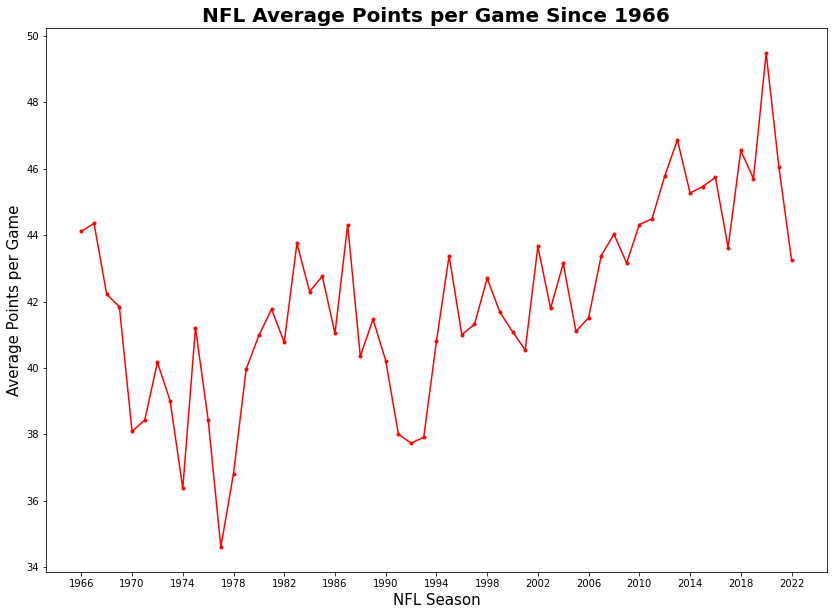

In [10]:
# Look at the trend of total points score per NFL game over the last 40 years
# We always hear about how all the rules are points to increased offense but wanted to see the trend of data

# Filter out playoffs and any game that doesn't have a home or away score
avgpts_df = df.loc[(df['schedule_playoff'] == False)]

# avgpts_df.to_excel('dannytest.xlsx')

avgpts_df = df[['schedule_season', 'score_home', 'score_away',]]

# Remove games that have NaN in score_home or score_away
avgpts_df = avgpts_df.dropna()
avgpts_df['Total_Points'] = avgpts_df.score_home + avgpts_df.score_away

pts_per_game = ps.sqldf("Select schedule_season as Season, sum(Total_Points)/count(schedule_season) as Points_Per_Game FROM avgpts_df group by schedule_season")

plt.figure(figsize=(14,10))
plt.xticks(pts_per_game.Season[::4])
plt.title('NFL Average Points per Game Since 1966', fontdict={'fontweight':'bold', 'fontsize': 20})
plt.xlabel('NFL Season', fontdict={'fontsize': 15})
plt.ylabel('Average Points per Game', fontdict={'fontsize': 15})
plt.plot(pts_per_game.Season, pts_per_game.Points_Per_Game, 'r.-')
plt.show()

